<a href="https://colab.research.google.com/github/nabiafshan/fastqc-hpc-tutorial/blob/master/pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install torch

In [0]:
import torch

# It starts with a tensor

Tensor == multidimensional array

Dimensionality of a tensor: bumber of indices used to refer to a scalar value in the tensor

List indexing and comaprison with tensor indexing

In [0]:
a = [1,2,3]
print(a[0], a[2], a)

1 3 [1, 2, 3]


PyTorch Tensor example

In [0]:
a = torch.ones(3)
print(a, a[0], float(a[0])) # to get a number instead of a tensor, wrap in float()
a[2] = 2.0
print(a)

tensor([1., 1., 1.]) tensor(1.) 1.0
tensor([1., 1., 2.])


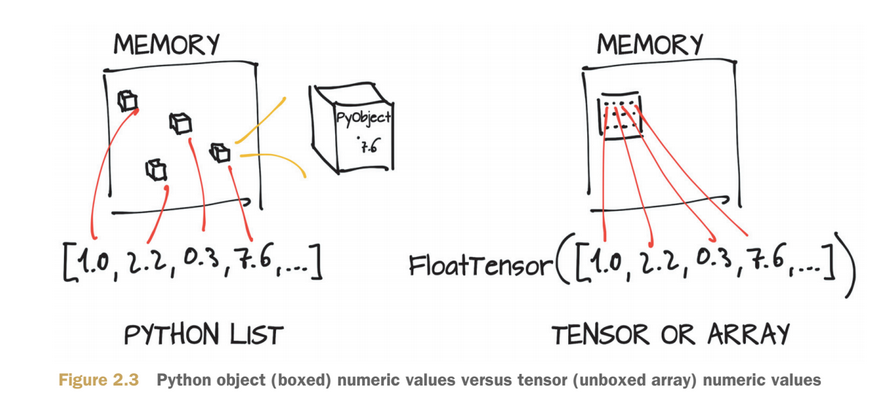

In [0]:
from IPython.display import Image
Image('list_vs_tensor.png')

In [0]:
points = torch.zeros(6) # zeros to get an array of specific shape
points[0] = 1 #overwrite 0s with numbers we care about
points[1] = 2
points[2] = 4
points[3] = 5
points[4] = 2
points[5] = 8
points

tensor([1., 2., 4., 5., 2., 8.])

In [0]:
points = torch.tensor([1,2,3,4,6]) #or just pass a list to the tensor function
points

tensor([1, 2, 3, 4, 6])

In [0]:
float(points[0]), float(points[1])

(1.0, 2.0)

In [0]:
# 2-dimensional tensor
points = torch.tensor([[1,4], # pass a list of lists to the constructor
                       [1,2],
                       [3,5]])
points

tensor([[1, 4],
        [1, 2],
        [3, 5]])

In [0]:
print(points.shape) # can enquire shape as usual

torch.Size([3, 2])


In [0]:
points = torch.zeros(3,2) # indexing a 2-D tensor
print(points)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [0]:
# there is also a function that generatess floats only
points = torch.FloatTensor([[1,4], # pass a list of lists to the constructor
                            [1,2],
                            [3,5]])  
print(points[0,1]) #extract an element
print(points[0]) # extract row
print(points[0, ])
print(points[:,0]) # extract column

tensor(4.)
tensor([1., 4.])
tensor([1., 4.])
tensor([1., 1., 3.])


There's something called `storage` in PyTorch


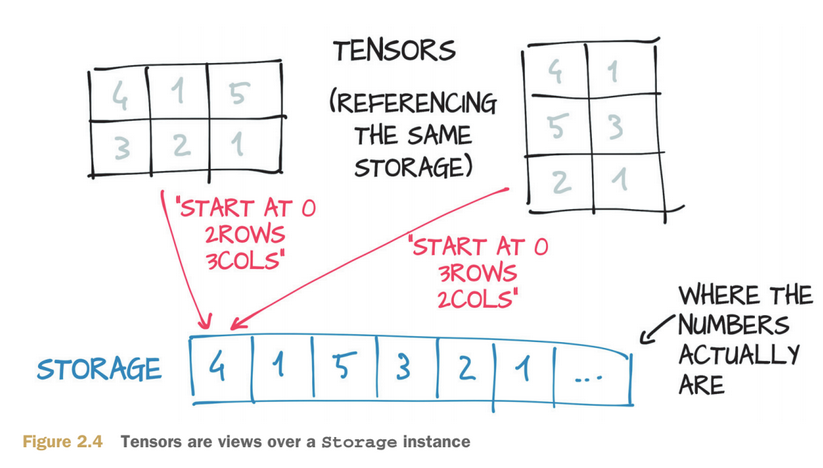

In [0]:
Image('storage.png')

In [0]:
points_storage = points.storage()
print(points_storage) # the actual storage is a contiguous array,
                        # irrespective of the shape of the array.
points_storage[0] # it is possible to index into the storage

# changing the storage will change the array it is referring to
points_storage[0] = 20
print(points)

 1.0
 4.0
 1.0
 2.0
 3.0
 5.0
[torch.FloatStorage of size 6]
tensor([[20.,  4.],
        [ 1.,  2.],
        [ 3.,  5.]])


`size`, `storage offset`, `stride` are necessary and sufficient to get the tensor from the storage. 

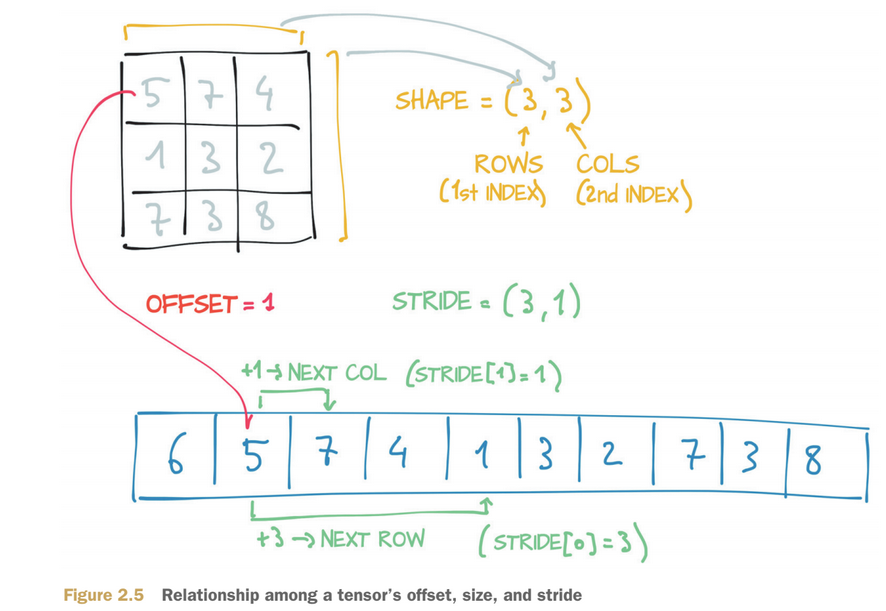

In [0]:
Image('offset.png')

In [0]:
second_point = points[1]
print(second_point.storage_offset()) #has offset 2, since we need to skip 1st pt
print(second_point.size(), second_point.shape) 
print(points.stride()) # num of elements that have to be skipped when 
                       # index is increased by 1 in each dimension

2
torch.Size([2]) torch.Size([2])
(2, 1)


So theoretically, you could access an element `i, j` in a 2D tensor by `storage_offset + stride[0] * i + stride[1] *j`.

Offset is usually 0.

One huge advantage of this `indirection` between `Tensor` and `Storage` leads to some operations such as _transposing a vector_ and  _extracting a subvector_ to being very inexpensive since they do not lead to memory reallocations. All you need is to allocate a new tensor object with a different `size`, `storage offset`, `stride`.


`indirection` (CS: ability to reference something using a name, reference, container instead of the value itself, _a call something by another name_.)